In [1]:
from jax_md import *
import jax
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
from helpers import *
from distances import *

In [2]:
N = 128
box_size = 200
dim = 2

In [3]:
displacement_fn, shift_fn = space.periodic(box_size)

In [8]:
init_positions = jr.uniform(jr.PRNGKey(0), (N, dim), minval=0.3*box_size, maxval=0.7*box_size)

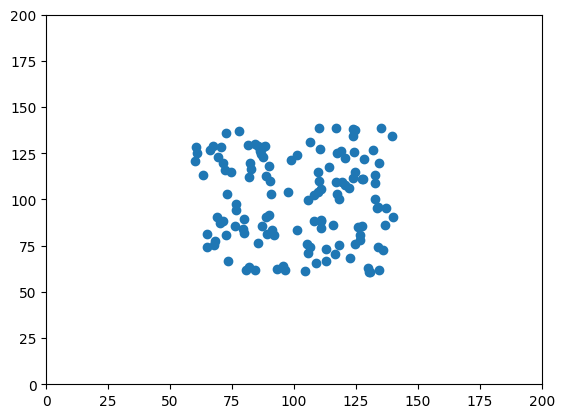

In [9]:
plt.scatter(init_positions[:, 0], init_positions[:, 1])
plt.xlim(0, box_size)
plt.ylim(0, box_size)
plt.show()

In [10]:
def lj(r, sigma=1, epsilon=1):
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

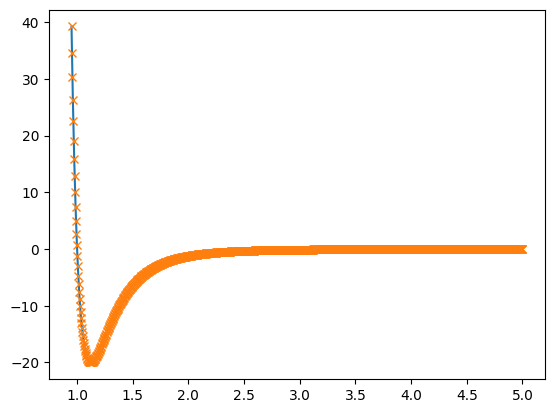

In [15]:
sigma = 1
epsilon = 20
rr = jnp.linspace(0.95*sigma, 5*sigma, 1000)
plt.plot(rr, lj(rr, sigma, epsilon))
plt.plot(rr, energy.lennard_jones(rr, sigma, epsilon), linewidth=0, marker="x")
plt.show()

In [21]:
def init_uniform(key, N):
    return jr.uniform(key, (N, 2), minval=0.8*box_size, maxval=0.9*box_size)

In [22]:
keys = jr.split(jr.PRNGKey(0), 1)

In [26]:
states = brownian_simulation_vec(keys, 1, 0.0001, jnp.arange(10000), N, shift_fn, energy.lennard_jones_pair(displacement_fn, sigma=sigma, epsilon=epsilon, r_onset=0.9, r_cutoff=500), init_uniform)

In [27]:
all_states = states
states = states[0, :, :, :]
print(jnp.shape(states))
jnp.save("blj", states)

(10002, 128, 2)


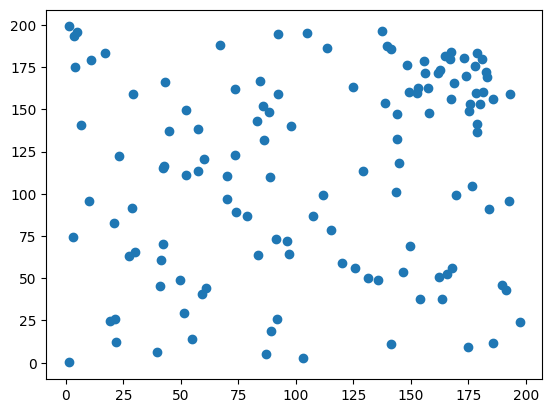

In [28]:
plt.scatter(states[-1, :, 0], states[-1, :, 1])
plt.show()

In [29]:
print(jnp.shape(all_states))

(1, 10002, 128, 2)


In [30]:
dists = pdist_sims_and_times(all_states)

In [31]:
dr = box_size/500
rdfs = rdf_pairwise_times_and_sims(dists, dr, 1000)

In [32]:
print(rdfs.shape)

(1, 10002, 1000)


In [33]:
rr = jnp.linspace(dr, box_size+dr, 1000)

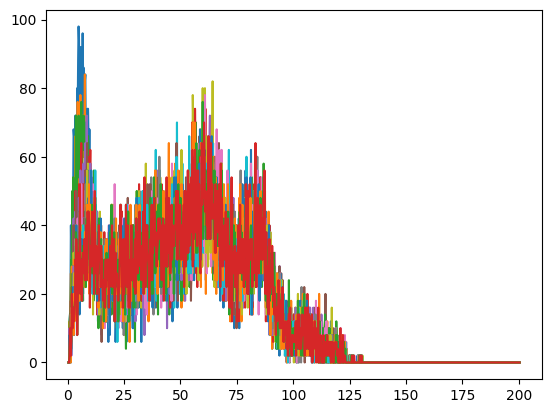

In [46]:
for k in range(1, 25):
    plt.plot(rr, rdfs[0, k*(1000//25), :])
plt.savefig("blj-all-times-except-initial")
plt.show()